In [ ]:
# ONLY USE THESE IMPORTS.
# PLEASE DON'T EDIT THIS CELL.
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
confusion_matrices_nb = []
confusion_matrices_gm = []

## Read Data

In [171]:
def read_data():
    x_train_frog = np.array([plt.imread('Data/train/frog/' + str(i) + '.jpg').reshape(-1) for i in range(0, 5000)])
    x_train_airplane = np.array([plt.imread('Data/train/airplane/' + str(i) + '.jpg').reshape(-1) for i in range(0, 5000)])
    x_train_automobile = np.array([plt.imread('Data/train/automobile/' + str(i) + '.jpg').reshape(-1) for i in range(0, 5000)])
    x_test_frog = np.array([plt.imread('Data/test/frog/' + str(i) + '.jpg').reshape(-1) for i in range(0, 1000)])
    x_test_airplane = np.array([plt.imread('Data/Test/airplane/' + str(i) + '.jpg').reshape(-1) for i in range(0, 1000)])
    x_test_automobile = np.array([plt.imread('Data/test/automobile/' + str(i) + '.jpg').reshape(-1) for i in range(0, 1000)])
    return  x_train_frog,x_train_airplane,x_train_automobile ,x_test_frog,x_test_airplane,x_test_automobile

In [172]:
def normalize(array):
    array = np.divide(array, 255)
    return array

In [173]:
x_train_frog,x_train_airplane,x_train_automobile ,x_test_frog,x_test_airplane,x_test_automobile = read_data()
print(np.shape(x_train_frog))
print(x_train_frog[1])
x_train_frog = normalize(x_train_frog)
x_train_automobile = normalize(x_train_automobile)
x_train_airplane = normalize(x_train_airplane)
x_test_frog = normalize(x_test_frog)
x_test_automobile = normalize(x_test_automobile)
x_test_airplane = normalize(x_test_airplane)

(5000, 3072)
[ 25  17  15 ... 168 204 190]


In [174]:
 
def reshape(x_train_airplane, x_train_frog, x_train_automobile ):
    x_train = x_train_airplane
    x_train = np.concatenate((x_train, x_train_frog))
    x_train = np.concatenate((x_train, x_train_automobile))
    return (x_train)

x_train = reshape(x_train_airplane, x_train_frog, x_train_automobile)
x_test = reshape(x_test_airplane, x_test_frog, x_test_automobile)

<hr style="border:2px solid black"> </hr>

## Construct Naive Bayes classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [175]:
def classifier(array, arraytest):

    gaussvalues=np.zeros(3000)
    Mu=np.mean(array, axis=0).reshape(1,-1)
    variance=np.var(array, axis=0).reshape(1,-1)

    for i in range (0, 3000):
        x=arraytest[i].reshape(1, -1)
       # print (np.shape(x))

        gauss= np.exp(-((x-Mu)**2)/(2*variance))/np.sqrt(2*np.pi*variance)
        gaussvalue=np.prod(gauss)

        gaussvalues[i]=gaussvalue
        #print(gaussvalue)


    gaussvalues = gaussvalues[:, np.newaxis]
    print(np.shape(gaussvalues))

    #print(np.shape(result))
    return gaussvalues

In [176]:
Airmatrix=classifier(x_train_airplane , x_test)
frogmatrix=classifier(x_train_frog, x_test)
automatrix=classifier(x_train_automobile,  x_test)

(3000, 1)
(3000, 1)
(3000, 1)


In [177]:
def predictmax(m1,m2,m3):
    matrix2 = np.concatenate((m1, m2), axis=1)
    TestMatrix = np.concatenate((matrix2, m3), axis=1)
    confusionarray= np.zeros(3000)
    airairc=0
    airautoc=0
    airfrogc=0
    for i in range (0,1000):
        confusionarray[i]= max(TestMatrix[i])
        if (confusionarray[i] == m1[i]):
            airairc += 1
        elif (confusionarray[i] == m2[i]):
            airfrogc += 1
        else:
            airautoc += 1
    print([airairc, airfrogc, airautoc])
    frogairc = 0
    frogautoc = 0
    frogfrogc = 0
    for i in range (1000,2000):
        confusionarray[i]= max(TestMatrix[i])
        if (confusionarray[i] == m1[i]):
            frogairc += 1
        elif (confusionarray[i] == m2[i]):
            frogfrogc += 1
        else:
            frogautoc += 1
    print([frogairc, frogfrogc, frogautoc])
    autoairc=0
    autoautoc=0
    autofrogc=0
    for i in range(2000, 3000):
        confusionarray[i] = max(TestMatrix[i])
        if (confusionarray[i] == m1[i]):
            autoairc += 1
        elif (confusionarray[i] == m2[i]):
            autofrogc += 1
        else:
            autoautoc += 1
    print([autoairc, autofrogc, autoautoc])
    cm = [[airairc, airfrogc, airautoc], [frogairc, frogfrogc, frogautoc],
          [autoairc, autofrogc, autoautoc]]
    return cm


[767, 132, 101]
[240, 716, 44]
[328, 291, 381]


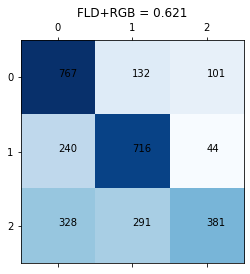

In [178]:
final= predictmax(Airmatrix, frogmatrix, automatrix)




confusion_matrix = np.array(final)
confusion_matrices_nb += [confusion_matrix]



def confusion(matrixx):
    accuracy = np.diag(matrixx).sum() / 3000
    plt.rc('figure', figsize=[4, 4])
    plt.matshow(matrixx, cmap="Blues")
    plt.title('FLD+RGB = {0:0.3f}'.format(accuracy))
    for i in range(0, matrixx.shape[0]):
        for j in range(0, matrixx.shape[1]):
            plt.annotate(matrixx[i, j], (j, i))
    plt.show()

confusion(confusion_matrix)

(0,)
(5000, 768)
(3000, 1)
(3000, 1)
(3000, 1)
[725, 146, 129]
[170, 777, 53]
[255, 313, 432]


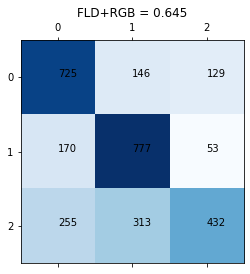

In [179]:

#16_bit
x_train_frog16=[]
print(np.shape(x_train_frog16))
x_train_airplane16=[]
x_train_automobile16=[]
x_test_frog16=[]
x_test_airplane16=[]
x_test_automobile16=[]


for i in range(0,5000):
    img = plt.imread('Data/train/frog/' + str(i) + '.jpg')
    img=cv2.resize(img, (16, 16), interpolation = cv2.INTER_AREA).reshape(-1)
    x_train_frog16.append(img)


for i in range(0, 5000):
    img = plt.imread('Data/train/airplane/' + str(i) + '.jpg')
    img=cv2.resize(img, (16, 16), interpolation=cv2.INTER_AREA).reshape(-1)
    x_train_airplane16.append(img)
for i in range(0, 5000):
    img = plt.imread('Data/train/automobile/' + str(i) + '.jpg')
    img = cv2.resize(img, (16, 16), interpolation=cv2.INTER_AREA).reshape(-1)
    x_train_automobile16.append(img)
for i in range(0, 1000):
    img = plt.imread('Data/test/frog/' + str(i) + '.jpg')
    img = cv2.resize(img, (16, 16), interpolation=cv2.INTER_AREA).reshape(-1)
    x_test_frog16.append(img)
for i in range(0, 1000):
    img = plt.imread('Data/Test/airplane/' + str(i) + '.jpg')
    img = cv2.resize(img, (16, 16), interpolation=cv2.INTER_AREA).reshape(-1)
    x_test_airplane16.append(img)
for i in range(0, 1000):
    img = plt.imread('Data/test/automobile/' + str(i) + '.jpg')
    img = cv2.resize(img, (16, 16), interpolation=cv2.INTER_AREA).reshape(-1)
    x_test_automobile16.append(img)

print(np.shape(x_train_frog16))
x_train_frog16 = normalize(x_train_frog16)
x_train_automobile16 = normalize(x_train_automobile16)
x_train_airplane16 = normalize(x_train_airplane16)
x_test_frog16 = normalize(x_test_frog16)
x_test_automobile16 = normalize(x_test_automobile16)
x_test_airplane16 = normalize(x_test_airplane16)
x_train16 = reshape(x_train_airplane16, x_train_frog16, x_train_automobile16)
x_test16 = reshape(x_test_airplane16, x_test_frog16, x_test_automobile16)
Airmatrix16=classifier(x_train_airplane16 , x_test16)
frogmatrix16=classifier(x_train_frog16, x_test16)
automatrix16=classifier(x_train_automobile16,  x_test16)
final16= predictmax(Airmatrix16, frogmatrix16, automatrix16)
confusion_matrix16 = np.array(final16)
confusion_matrices_nb += [confusion_matrix16]
confusion(confusion_matrix16)




(3000, 1)
(3000, 1)
(3000, 1)
[712, 141, 147]
[166, 779, 55]
[253, 321, 426]


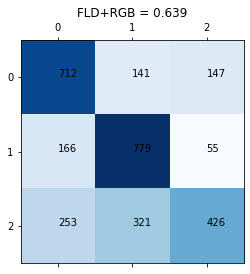

In [180]:
#8bit
x_train_frog8=[]
x_train_airplane8=[]
x_train_automobile8=[]
x_test_frog8=[]
x_test_airplane8=[]
x_test_automobile8= []

for i in range(0, 5000):
    img = plt.imread('Data/train/frog/' + str(i) + '.jpg')
    img = cv2.resize(img, (8, 8), interpolation=cv2.INTER_AREA).reshape(-1)
    x_train_frog8.append(img)

for i in range(0, 5000):
    img = plt.imread('Data/train/airplane/' + str(i) + '.jpg')
    img = cv2.resize(img, (8, 8), interpolation=cv2.INTER_AREA).reshape(-1)
    x_train_airplane8.append(img)
for i in range(0, 5000):
    img = plt.imread('Data/train/automobile/' + str(i) + '.jpg')
    img = cv2.resize(img, (8, 8), interpolation=cv2.INTER_AREA).reshape(-1)
    x_train_automobile8.append(img)
for i in range(0, 1000):
    img = plt.imread('Data/test/frog/' + str(i) + '.jpg')
    img = cv2.resize(img, (8, 8), interpolation=cv2.INTER_AREA).reshape(-1)
    x_test_frog8.append(img)
for i in range(0, 1000):
    img = plt.imread('Data/Test/airplane/' + str(i) + '.jpg')
    img = cv2.resize(img, (8, 8), interpolation=cv2.INTER_AREA).reshape(-1)
    x_test_airplane8.append(img)
for i in range(0, 1000):
    img = plt.imread('Data/test/automobile/' + str(i) + '.jpg')
    img = cv2.resize(img, (8, 8), interpolation=cv2.INTER_AREA).reshape(-1)
    x_test_automobile8.append(img)

x_train_frog8 = normalize(x_train_frog8)
x_train_automobile8 = normalize(x_train_automobile8)
x_train_airplane8 = normalize(x_train_airplane8)
x_test_frog8 = normalize(x_test_frog8)
x_test_automobile8 = normalize(x_test_automobile8)
x_test_airplane8 = normalize(x_test_airplane8)
x_train8 = reshape(x_train_airplane8, x_train_frog8, x_train_automobile8)
x_test8 = reshape(x_test_airplane8, x_test_frog8, x_test_automobile8)
Airmatrix8=classifier(x_train_airplane8 , x_test8)
frogmatrix8=classifier(x_train_frog8, x_test8)
automatrix8=classifier(x_train_automobile8,  x_test8)
final8= predictmax(Airmatrix8, frogmatrix8, automatrix8)
confusion_matrix8 = np.array(final8)
confusion_matrices_nb += [confusion_matrix8]
confusion(confusion_matrix8)


(3000, 1)
(3000, 1)
(3000, 1)
[681, 137, 182]
[164, 775, 61]
[256, 360, 384]


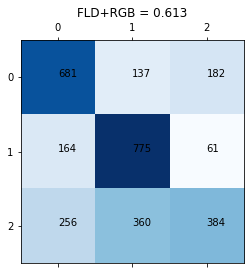

In [181]:

#4bit
x_train_frog4=[]
x_train_airplane4=[]
x_train_automobile4=[]
x_test_frog4=[]
x_test_airplane4=[]
x_test_automobile4= []

for i in range(0, 5000):
    img = plt.imread('Data/train/frog/' + str(i) + '.jpg')
    img = cv2.resize(img, (4, 4), interpolation=cv2.INTER_AREA).reshape(-1)
    x_train_frog4.append(img)

for i in range(0, 5000):
    img = plt.imread('Data/train/airplane/' + str(i) + '.jpg')
    img = cv2.resize(img, (4, 4), interpolation=cv2.INTER_AREA).reshape(-1)
    x_train_airplane4.append(img)
for i in range(0, 5000):
    img = plt.imread('Data/train/automobile/' + str(i) + '.jpg')
    img = cv2.resize(img, (4, 4), interpolation=cv2.INTER_AREA).reshape(-1)
    x_train_automobile4.append(img)
for i in range(0, 1000):
    img = plt.imread('Data/test/frog/' + str(i) + '.jpg')
    img = cv2.resize(img, (4, 4), interpolation=cv2.INTER_AREA).reshape(-1)
    x_test_frog4.append(img)
for i in range(0, 1000):
    img = plt.imread('Data/Test/airplane/' + str(i) + '.jpg')
    img = cv2.resize(img, (4, 4), interpolation=cv2.INTER_AREA).reshape(-1)
    x_test_airplane4.append(img)
for i in range(0, 1000):
    img = plt.imread('Data/test/automobile/' + str(i) + '.jpg')
    img = cv2.resize(img, (4, 4), interpolation=cv2.INTER_AREA).reshape(-1)
    x_test_automobile4.append(img)

x_train_frog4 = normalize(x_train_frog4)
x_train_automobile4 = normalize(x_train_automobile4)
x_train_airplane4 = normalize(x_train_airplane4)
x_test_frog4 = normalize(x_test_frog4)
x_test_automobile4 = normalize(x_test_automobile4)
x_test_airplane4 = normalize(x_test_airplane4)
x_train4 = reshape(x_train_airplane4, x_train_frog4, x_train_automobile4)
x_test4 = reshape(x_test_airplane4, x_test_frog4, x_test_automobile4)
Airmatrix4=classifier(x_train_airplane4 , x_test4)
frogmatrix4=classifier(x_train_frog4, x_test4)
automatrix4=classifier(x_train_automobile4,  x_test4)
final4= predictmax(Airmatrix4, frogmatrix4, automatrix4)
confusion_matrix4 = np.array(final4)
confusion_matrices_nb += [confusion_matrix4]
confusion(confusion_matrix4)

<hr style="border:2px solid black"> </hr>

## Construct Gaussian Generative Model classifier for each of the 3 classes.
#### Test each classifier on all images in X_Test. 
#### Construct Confusion Matrix.

In [182]:
x_train_frog21,x_train_airplane21,x_train_automobile21 ,x_test_frog21,x_test_airplane21,x_test_automobile21 = read_data()
x_train_frog21 = normalize(x_train_frog21)
x_train_automobile21 = normalize(x_train_automobile21)
x_train_airplane21 = normalize(x_train_airplane21)
x_test_frog21 = normalize(x_test_frog21)
x_test_automobile21 = normalize(x_test_automobile21)
x_test_airplane21 = normalize(x_test_airplane21)

x_train21 = reshape(x_train_airplane21, x_train_frog21, x_train_automobile21)
x_test21 = reshape(x_test_airplane21, x_test_frog21, x_test_automobile21)

In [183]:
def mean(x_train,v1,v2,v3):
    mean = []
    for i in range(0, v3):
        a = x_train[v1:v2, i]
        mean.append(np.mean(a))
    return  mean    

In [184]:
def covariance(test,train,p_val):
    mean_air = mean(train, 0, 5000,p_val)
    mean_frog = mean(train, 5000, 10000,p_val)
    mean_auto = mean(train, 10000, 15000,p_val)
    s1 =  np.matmul(np.transpose((train[0:5000,:]-mean_air)),(train[0:5000,:]-mean_air))
    s2 =  np.matmul(np.transpose((train[5000:10000,:]-mean_frog)),(train[5000:10000,:]-mean_frog))
    s3 =  np.matmul(np.transpose((train[10000:15000,:]-mean_auto)),(train[10000:15000,:]-mean_auto))
    s = (5000/15000)*s1+(5000/15000)*s2+s3*(5000/15000)
    s_1 = np.linalg.pinv(s)
    
    class_air = []
    class_frog = []
    class_auto = []
    for i in range(0,3000):
        temp =test[i,:]-mean_air
        t = np.matmul(temp,s_1)
        tt = np.matmul(t,np.transpose(temp))
        class_air.append(np.exp(-0.5*tt))
        
    for i in range(0,3000):
        temp = test[i,:]-mean_frog
        t = np.matmul(temp,s_1)
        tt = np.matmul(t,np.transpose(temp))
        class_frog.append(np.exp(-0.5*tt))
        
    for i in range(0,3000):
        temp = test[i,:]-mean_auto
        t = np.matmul(temp,s_1)
        tt = np.matmul(t,np.transpose(temp))
        class_auto.append(np.exp(-0.5*tt))  
        
    class_auto =np.asarray(class_auto)
    class_air = np.asarray(class_air)
    class_frog = np.asarray(class_frog)
    class_auto =  class_auto[:, np.newaxis]
    class_frog =  class_frog[:, np.newaxis]
    class_air =  class_air[:, np.newaxis]
    
    

    
    return class_air,class_frog, class_auto
    
  

[763, 90, 147]
[76, 783, 141]
[200, 144, 656]


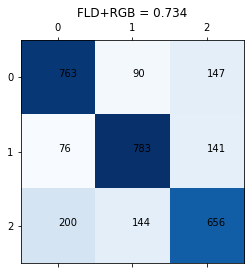

In [185]:
class_air,class_frog, class_auto = covariance(x_test21,x_train21,3072)
final1= predictmax(class_air,class_frog, class_auto)

confusion_matrix1 = np.array(final1)
confusion_matrices_gm += [confusion_matrix1]



def confusion2(matrixx):
    accuracy = np.diag(matrixx).sum() / 3000
    plt.rc('figure', figsize=[4, 4])
    plt.matshow(matrixx, cmap="Blues")
    plt.title('FLD+RGB = {0:0.3f}'.format(accuracy))
    for i in range(0, matrixx.shape[0]):
        for j in range(0, matrixx.shape[1]):
            plt.annotate(matrixx[i, j], (j, i))

confusion2(confusion_matrix1)

(5000, 768)
[800, 92, 108]
[65, 827, 108]
[161, 123, 716]


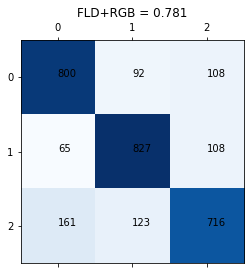

In [186]:
#16_bit
x_train_frog16_2=[]
x_train_airplane16_2=[]
x_train_automobile16_2=[]
x_test_frog16_2=[]
x_test_airplane16_2=[]
x_test_automobile16_2=[]


for i in range(0,5000):
    img = plt.imread('Data/train/frog/' + str(i) + '.jpg')
    img=cv2.resize(img, (16, 16), interpolation = cv2.INTER_AREA).reshape(-1)
    x_train_frog16_2.append(img)


for i in range(0, 5000):
    img = plt.imread('Data/train/airplane/' + str(i) + '.jpg')
    img=cv2.resize(img, (16, 16), interpolation=cv2.INTER_AREA).reshape(-1)
    x_train_airplane16_2.append(img)
for i in range(0, 5000):
    img = plt.imread('Data/train/automobile/' + str(i) + '.jpg')
    img = cv2.resize(img, (16, 16), interpolation=cv2.INTER_AREA).reshape(-1)
    x_train_automobile16_2.append(img)
for i in range(0, 1000):
    img = plt.imread('Data/test/frog/' + str(i) + '.jpg')
    img = cv2.resize(img, (16, 16), interpolation=cv2.INTER_AREA).reshape(-1)
    x_test_frog16_2.append(img)
for i in range(0, 1000):
    img = plt.imread('Data/Test/airplane/' + str(i) + '.jpg')
    img = cv2.resize(img, (16, 16), interpolation=cv2.INTER_AREA).reshape(-1)
    x_test_airplane16_2.append(img)
for i in range(0, 1000):
    img = plt.imread('Data/test/automobile/' + str(i) + '.jpg')
    img = cv2.resize(img, (16, 16), interpolation=cv2.INTER_AREA).reshape(-1)
    x_test_automobile16_2.append(img)


x_train_frog16_2 = normalize(x_train_frog16_2)
x_train_automobile16_2 = normalize(x_train_automobile16_2)
x_train_airplane16_2 = normalize(x_train_airplane16_2)
x_test_frog16_2 = normalize(x_test_frog16_2)
x_test_automobile16_2 = normalize(x_test_automobile16_2)
x_test_airplane16_2 = normalize(x_test_airplane16_2)
x_train16_2 = reshape(x_train_airplane16_2, x_train_frog16_2, x_train_automobile16_2)
x_test16_2 = reshape(x_test_airplane16_2, x_test_frog16_2, x_test_automobile16_2)
print(np.shape(x_train_frog16_2))
class_air16,class_frog16, class_auto16 = covariance(x_test16_2,x_train16_2,768)
final16_2= predictmax(class_air16,class_frog16, class_auto16)
confusion_matrix16_2 = np.array(final16_2)
confusion_matrices_gm += [confusion_matrix16_2]
confusion2(confusion_matrix16_2)

[790, 84, 126]
[58, 842, 100]
[176, 119, 705]


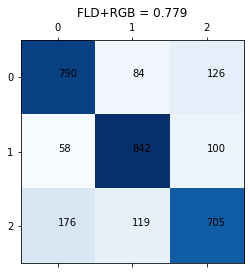

In [187]:
#8_bit
x_train_frog8_2=[]
x_train_airplane8_2=[]
x_train_automobile8_2=[]
x_test_frog8_2=[]
x_test_airplane8_2=[]
x_test_automobile8_2=[]


for i in range(0,5000):
    img = plt.imread('Data/train/frog/' + str(i) + '.jpg')
    img=cv2.resize(img, (8, 8), interpolation = cv2.INTER_AREA).reshape(-1)
    x_train_frog8_2.append(img)


for i in range(0, 5000):
    img = plt.imread('Data/train/airplane/' + str(i) + '.jpg')
    img=cv2.resize(img, (8, 8), interpolation=cv2.INTER_AREA).reshape(-1)
    x_train_airplane8_2.append(img)
for i in range(0, 5000):
    img = plt.imread('Data/train/automobile/' + str(i) + '.jpg')
    img = cv2.resize(img, (8, 8), interpolation=cv2.INTER_AREA).reshape(-1)
    x_train_automobile8_2.append(img)
for i in range(0, 1000):
    img = plt.imread('Data/test/frog/' + str(i) + '.jpg')
    img = cv2.resize(img, (8, 8), interpolation=cv2.INTER_AREA).reshape(-1)
    x_test_frog8_2.append(img)
for i in range(0, 1000):
    img = plt.imread('Data/Test/airplane/' + str(i) + '.jpg')
    img = cv2.resize(img, (8, 8), interpolation=cv2.INTER_AREA).reshape(-1)
    x_test_airplane8_2.append(img)
for i in range(0, 1000):
    img = plt.imread('Data/test/automobile/' + str(i) + '.jpg')
    img = cv2.resize(img, (8, 8), interpolation=cv2.INTER_AREA).reshape(-1)
    x_test_automobile8_2.append(img)


x_train_frog8_2 = normalize(x_train_frog8_2)
x_train_automobile8_2 = normalize(x_train_automobile8_2)
x_train_airplane8_2 = normalize(x_train_airplane8_2)
x_test_frog8_2 = normalize(x_test_frog8_2)
x_test_automobile8_2 = normalize(x_test_automobile8_2)
x_test_airplane8_2 = normalize(x_test_airplane8_2)
x_train8_2 = reshape(x_train_airplane8_2, x_train_frog8_2, x_train_automobile8_2)
x_test8_2 = reshape(x_test_airplane8_2, x_test_frog8_2, x_test_automobile8_2)

class_air8,class_frog8, class_auto8 = covariance(x_test8_2,x_train8_2,192)
final8_2= predictmax(class_air8,class_frog8, class_auto8)
confusion_matrix8_2 = np.array(final8_2)
confusion_matrices_gm += [confusion_matrix8_2]
confusion2(confusion_matrix8_2)

[777, 70, 153]
[53, 826, 121]
[199, 119, 682]


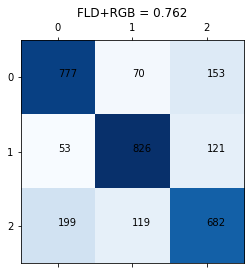

In [188]:
#4_bit
x_train_frog4_2=[]
x_train_airplane4_2=[]
x_train_automobile4_2=[]
x_test_frog4_2=[]
x_test_airplane4_2=[]
x_test_automobile4_2=[]


for i in range(0,5000):
    img = plt.imread('Data/train/frog/' + str(i) + '.jpg')
    img=cv2.resize(img, (4, 4), interpolation = cv2.INTER_AREA).reshape(-1)
    x_train_frog4_2.append(img)


for i in range(0, 5000):
    img = plt.imread('Data/train/airplane/' + str(i) + '.jpg')
    img=cv2.resize(img, (4, 4), interpolation=cv2.INTER_AREA).reshape(-1)
    x_train_airplane4_2.append(img)
for i in range(0, 5000):
    img = plt.imread('Data/train/automobile/' + str(i) + '.jpg')
    img = cv2.resize(img, (4, 4), interpolation=cv2.INTER_AREA).reshape(-1)
    x_train_automobile4_2.append(img)
for i in range(0, 1000):
    img = plt.imread('Data/test/frog/' + str(i) + '.jpg')
    img = cv2.resize(img, (4, 4), interpolation=cv2.INTER_AREA).reshape(-1)
    x_test_frog4_2.append(img)
for i in range(0, 1000):
    img = plt.imread('Data/Test/airplane/' + str(i) + '.jpg')
    img = cv2.resize(img, (4, 4), interpolation=cv2.INTER_AREA).reshape(-1)
    x_test_airplane4_2.append(img)
for i in range(0, 1000):
    img = plt.imread('Data/test/automobile/' + str(i) + '.jpg')
    img = cv2.resize(img, (4, 4), interpolation=cv2.INTER_AREA).reshape(-1)
    x_test_automobile4_2.append(img)


x_train_frog4_2 = normalize(x_train_frog4_2)
x_train_automobile4_2 = normalize(x_train_automobile4_2)
x_train_airplane4_2 = normalize(x_train_airplane4_2)
x_test_frog4_2 = normalize(x_test_frog4_2)
x_test_automobile4_2 = normalize(x_test_automobile4_2)
x_test_airplane4_2 = normalize(x_test_airplane4_2)
x_train4_2 = reshape(x_train_airplane4_2, x_train_frog4_2, x_train_automobile4_2)
x_test4_2 = reshape(x_test_airplane4_2, x_test_frog4_2, x_test_automobile4_2)

class_air4,class_frog4, class_auto4 = covariance(x_test4_2,x_train4_2,48)
final4_2= predictmax(class_air4,class_frog4, class_auto4)
confusion_matrix4_2 = np.array(final4_2)
confusion_matrices_gm += [confusion_matrix4_2]
confusion2(confusion_matrix4_2)

<hr style="border:2px solid black"> </hr>

## Repeat previous two confusion matrices for image sizes 16,8,4.
### Return confusion_matrices (array containing 8 matrices, 4 for naive bayes, 4 for gaussian generative model). 
#### confusion_matrices_nb = [confusion_matrix_nb_32, confusion_matrix_nb_16, confusion_matrix_nb_8, confusion_matrix_nb_4].
#### confusion_matrices_gm = [confusion_matrix_gm_32, confusion_matrix_gm_16, confusion_matrix_gm_8, confusion_matrix_gm_4].

In [189]:
confusion_matrices = confusion_matrices_nb + confusion_matrices_gm

<hr style="border:2px solid black"> </hr>

## The below 2 cells will only work if you return confusion_matrices (previous cell) with all 8 matrices in it.
## Please don't edit the below cells.
## Please run them and save the notebook before uploading so the script can check the saved image.
## Please don't change the order of the matrices.


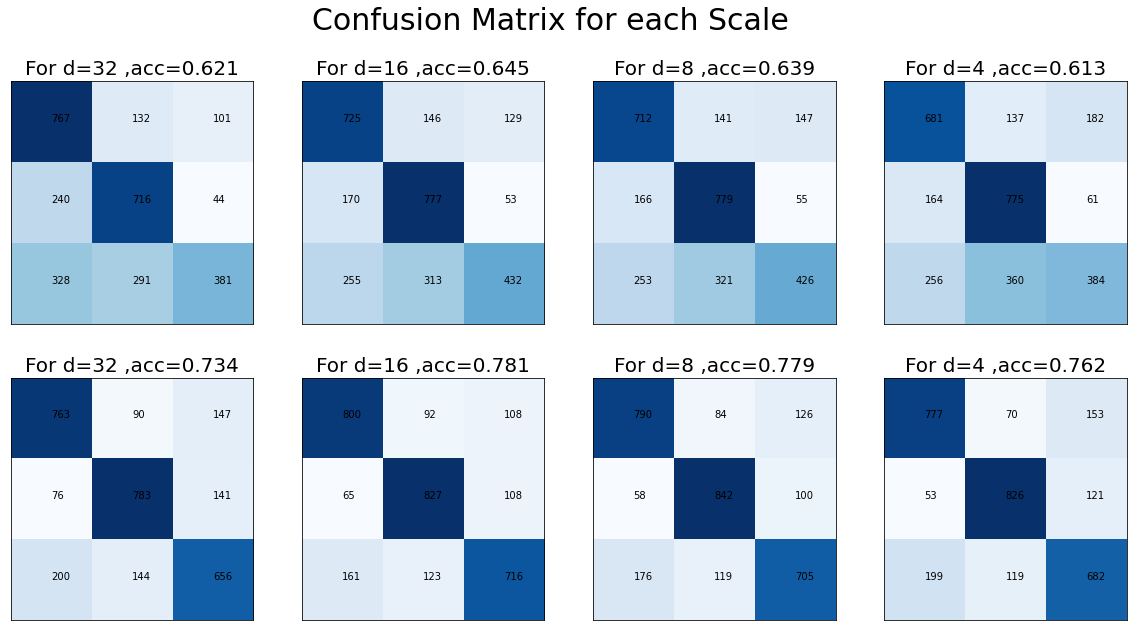

In [190]:
dims = [32,16,8,4,32,16,8,4]
fig, axs = plt.subplots(2, 4,figsize=(20,10))
fig.suptitle("Confusion Matrix for each Scale",fontsize=30)
for pi in range(0,axs.shape[0]):
    for pj in range(0,axs.shape[1]):
        index = np.round(pi*4+pj)
        cm = confusion_matrices[index]
        axs[pi,pj].matshow(cm,cmap="Blues")
        axs[pi,pj].set_title("For d="+str(dims[index])+" ,acc="+str(np.round(np.diag(cm).sum()/3000,3)),fontsize=20)
        for i in range(0,cm.shape[0]):
            for j in range(0,cm.shape[1]):
                axs[pi,pj].set_xticks([])
                axs[pi,pj].set_yticks([])
                axs[pi,pj].annotate(cm[i,j],(j,i))

[32, 16, 8, 4]
[0.6213333333333333, 0.6446666666666667, 0.639, 0.6133333333333333]


Text(0.5, 1.0, 'NB VS GM')

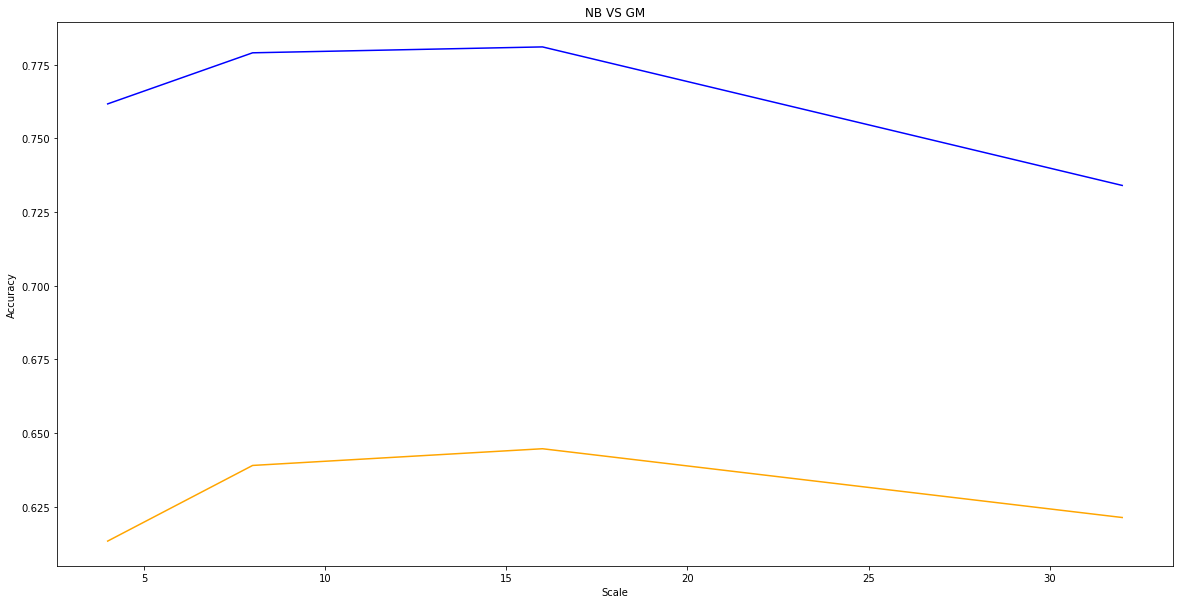

In [192]:
plt.figure(figsize=(20,10))
print(dims[:4])
print([np.diag(cm).sum()/3000 for cm in confusion_matrices_nb])
plt.plot(dims[:4],[np.diag(cm).sum()/3000 for cm in confusion_matrices_nb],color='orange')
plt.plot(dims[:4],[np.diag(cm).sum()/3000 for cm in confusion_matrices_gm],color='blue')
plt.xlabel('Scale')
plt.ylabel('Accuracy')
plt.title('NB VS GM')

<hr style="border:2px solid black"> </hr>

## Comment on the results ##

### 
Edit Here
###